# [통계 분석]

In [28]:
import numpy as np
import pandas as pd

from scipy import stats

# https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
from statsmodels.formula.api import ols

import sklearn

## 1. 빈도 분석

### 각 변수 값에 속한 분포의 특성을 찾아내는 분석기법
1) 도수분포표: 빈도, 퍼센트, 유효비율, 누적백분율 등의 도표 

2) 집중경향치(central tendency): 최빈값(mode), 중위수(median), 평균(mean)

3) 분산도(dispersion): 범위, 분산, 표준편차, 평균의 표준오차(S.E. mean) 

- size()나 count() 함수 이용
- pd.crosstab() # 교차표(혼동행렬)
- np.trace() # 대각합


In [18]:
x = pd.crosstab(df.target, df.target)
print(pd.crosstab(df.target, df.target, margins=True, normalize='all'))
np.trace(x)

target         0         1         2       All
target                                        
0       0.333333  0.000000  0.000000  0.333333
1       0.000000  0.333333  0.000000  0.333333
2       0.000000  0.000000  0.333333  0.333333
All     0.333333  0.333333  0.333333  1.000000


150

## 2. 기술 통계 분석

### 자료의 필요 통계량을 간단히 산출하는 방법
1) 기술통계량: 평균, 표준편차, 최소값, 최대값, 빈도수, 분산, 범위, 평균 표준오차, 왜도, 첨도

- mean()
- min()
- max()
- var()
- std()
- sem() # 평균의 표준편차
- describe()
- median
- quantile(q=0.xx) # 백분위수

2) pandas: describe()

## 3. 카이제곱 검정

### 카이제곱 분포에 기초, 관찰 빈도와 기대 빈도가 유의하게 다른지 검정
- 범주형 자료에 대한 검정
- 검정통계량은 귀무가설이 참일 때, 근사적으로 df: (r-1)(c-1)인 카이제곱 분포를 따른다
- stats.chisquare(data1, data2)
- stats.chi2_contingency(array)

### 1) 적합도 검정

- 관찰된 빈도가 기대되는 빈도와 다른지의 여부(단일 기준 분류 표본)

In [28]:
data1 = [4, 6, 17, 16, 8, 9] # 관측값
data2 = [10, 10, 10, 10, 10, 10] # 기대도수 or 비율

# data2가 기대도수가 아닌 비율일 경우, (관측빈도 x 비율)로 자료를 변환해야 함
chis = stats.chisquare(data1, data2)
print(chis)

Power_divergenceResult(statistic=6.083333333333333, pvalue=0.047755231078826975)


### 2) 독립성 검정

- 두 요인 간에 관계가 있는지 검정(복수 기준 분류 표본)

In [33]:
ind = np.array([[6, 4, 5, 10], [8, 5, 3, 3], [5, 4, 8, 4],
              [4, 11, 7, 13], [5, 8, 7, 6], [7, 3, 5, 9]])
chi_stat, p_value, dof, ex = stats.chi2_contingency(ind)
print(chi_stat)
print(p_value)
print(dof)

16.490612061288754
0.35021521809742745
15


### 3) 동일성 검정

- 서로 다른 모집단에서 독립적으로 뽑은 표본들의 분포가 서로 동질한지 검정

## 4. T-test

### 두 집단의 평균 차이가 유의한지 검정

### 양측 검정 / 단측 검정 설정 방법

- t통계량은 [t통계량, pvalue = stats.ttest_ind(x, y)] 등으로 얻어냄
- stats.ttest들은 모두 양측
- 단측 검정을 원한다면
- stats.t.cdf(t통계량, len(x)+len(y)#자유도, -2) * 2 (양측 검정)
- stats.t.cdf(t통계량, len(x)+len(y)#자유도, -2)     (단측 검정 - 좌)
- stats.t.sf(t통계량, len(x)+len(y)#자유도, -2)      (단측 검정 - 우)

### 1) 단일 표본 t-검정

- 정규 분포의 표본에 대해 기댓값을 조사하는 검정방법
- t-통계량 사용, 분포가 스튜던트-t 분포라는 사실로 유의 확률을 구함
- stats.ttest_1samp(데이터1, popmean=검정할 기댓값(모수))

### 2) 독립 표본 t-검정

- 두 개의 독립적인 정규 분포에서 나온 데이터셋 사용, 두 정규 분포의 기댓값이 동일한지
- 자유도가 $N_1 + N_2 -2$인 스튜던트-t 분포를 따름
- 분산이 같은 경우, 분산이 다른 경우
- stats.ttest_ind(데이터1, 데이터2, equal_var=False) # equal_var는 등분산 여부

### 3) 대응 표본 t-검정

- 두 집단의 표본이 1대1 대응하는 경우 사용
- stats.ttest_rel(데이터1, 데이터2)

## 5. 분산 분석

### 여러 그룹간의 평균 차이가 통계적으로 유의미한지 분석
- 각 그룹의 변수가 정규 분포를 가정하고 있는지
- 분산은 각각의 모집단에서 동일한지
- 표본들이 독립적으로 표집 되었는지

### 1) 일원 배치 분산분석

- 종속변수 1개, 독립변수 1개일 때
- model = ols('종속변수 ~ C(독립변수)', 상수항).fit()
- stats.anova_lm(model)

### 2) 이원 배치 분산분석

- 종속변수 1개, 독립변수 2개 이상일 때
- formula = '종속변수 ~ C(독립1) + C(독립2) + C(독립1):C(독립2)' # ':'는 교호작용
- model = ols(formula, 상수항).fit()
- stats.anova_lm(model, typ=2) # Type 2 (교호작용???)

## 6. 선형 회귀 분석

### 연속형 변수들에 대해 선형 모델을 만들고 이를 통해 예측하는 방법

In [26]:
# Load modules and data
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(spector_data.endog, spector_data.exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Thu, 24 Jan 2019   Prob (F-statistic):            0.00157
Time:                        19:58:38   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

## 7. 일반화 선형 모형

### 종속변수의 정규성 가정을 할 수 없는 경우 연결 함수를 이용, 일반화
- 종속변수가 범주형 변수이거나, count data인 경우
- link funtion logit, probit으로 변경해서 해보기

In [56]:
# Load modules and data

data = sm.datasets.scotland.load()
data.exog = sm.add_constant(data.exog)

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Thu, 24 Jan 2019   Deviance:                     0.087389
Time:                        20:31:07   Pearson chi2:                   0.0860
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0178      0.011     -1.548      0.122      -0.040       0.005
x1          4.962e-05   1.62e-05      3.060      0.0

C:\Users\JH\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


## 8. 상관관계 분석

### 두 변수간에 어떤 선형적 관계를 갖고 있는지 분석(인과적 관계 X)
- 데이터.corr(method='pearson')

## 9. 로지스틱 회귀 분석

### 종속변수가 범주형일 때 회귀분석 방법
- LogisticRegression(C=1).fit(X, y)
- 모델은 .score(X, y)로 평가
- 머신러닝 부분에서 정리

## 10. 판별 분석(LDA, QDA)

### 두 개 이상의 모집단 정보를 이용해 어느 집단에서 추출된 것인지 분석
- 클래스 정보를 보호
- 두 클래스를 포함하는 data들을 가장 잘 감소시키는 axis를 찾는데 목적
- from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
- from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
- qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

## 11. 주성분 분석(PCA)

### 데이터 집합을 새로운 좌표축으로 변환시키는 방법
- 최소한의 차원으로 최대한의 설명력을 노림
- https://excelsior-cjh.tistory.com/167

In [66]:
from sklearn.decomposition import PCA

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

pca = PCA(n_components=3)
pca.fit(X)

print('eigen_value :', pca.explained_variance_)
print('explained variance ratio :', pca.explained_variance_ratio_)

eigen_value : [0.77830975 0.1351726  0.01034272]
explained variance ratio : [0.84248607 0.14631839 0.01119554]


## 12. 요인 분석

### 변수들 간 공통적인 요인이 있다고 가정, 상호 관련성을 집약하는 방법
- https://stackoverflow.com/questions/31680699/how-to-calculate-factoranalysis-scores-using-python-scikit-learn

from sklearn import decomposition, preprocessing
from sklearn.cross_validation import cross_val_score
import csv
import numpy as np

data = np.genfromtxt('test.csv', delimiter=',')

def compute_scores(X):
    n_components = np.arange(0, len(X), 1)
    X = preprocessing.scale(X) # data normalisation attempt
    pca = decomposition.PCA()
    fa = decomposition.FactorAnalysis(n_components=1)

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        #pca_scores.append(np.mean(cross_val_score(pca, X))) # if I attempt to compute pca_scores I get the error.
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    print pca_scores, fa_scores
compute_scores(data)

## 13. 군집 분석

### 데이터에 대해 기준을 정하여 군집을 만드는 방법
- https://datascienceschool.net/view-notebook/2205ad8f0c5947c08696e8927b466341/

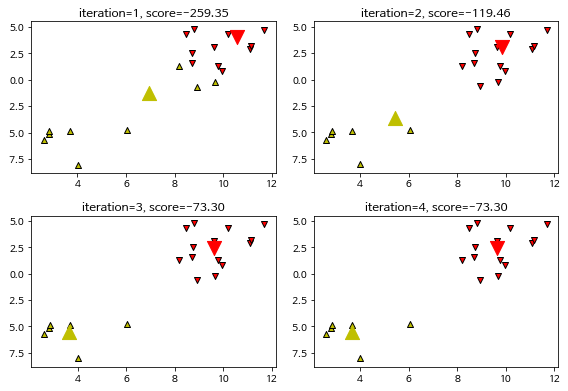

In [68]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=8).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

## 14. 단일 표본 z-검정

### 모분산 $\sigma$의 값을 알고 두 집단 간에 평균의 차이가 있는지 검정

In [3]:
N = 10
mu_0 = 0
np.random.seed(0)
x = stats.norm(mu_0).rvs(N)

def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * stats.norm().sf(np.abs(z))

ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

## 15. 정규성 검정

### 회귀 분석 등에서 확률분포가 가우시안 정규 분포를 따르는지 확인
- t-test, ANOVA 등과 같이 정규 분포의 조건이 있는 분석들 대상(n<30의 경우 더욱 필요)
- QQplot을 통해 시각적으로 확인하는 것이 가장 간단, 직관적


- SciPy
    - stats.ks_2samp() # Kolmogorov-Smirnov test # 표본수가 2000 초과일 때
    - stats.shapiro() # Shapiro–Wilk test # 표본수가 2000 미만일 때
    - stats.anderson() # Anderson–Darling test # 표본수가 매우 많아도 할 수 있음
    - stats.mstats.normaltest() # D'Agostino's K-squared test
- StatsModels
    - statsmodels.stats.stattools.omni_normtest # Omnibus Normality test
    - statsmodels.stats.stattools.jarque_beta # Jarque–Bera test
    - statsmodels.stats.diagnostic.kstest_normal # Kolmogorov-Smirnov test
    - statsmodels.stats.diagnostic.lillifors # Lilliefors test
    
- (20190418)
    - stats.normaltest(데이터)

## 16. 등분산 검정

### 두 정규 분포로 생성된 데이터 집합으로부터 분산 모수가 같은지 확인
- 기본적인 방법은 F분포가 되는 표본분산의 비율 사용 $F = \frac{s_1^2}{s_2^2}$
- stats.bartlett(데이터1, 데이터2)
- stats.fligner(데이터1, 데이터2)
- stats.levene(데이터1, 데이터2)

# [기초 통계]

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data['data'], columns=['sepal_length', 'sepal_width',
                                        'petal_length', 'petal_width'])
df['target'] = data['target']

## 통계량 구하기, 계산 하기

- mean()
- min()
- max()
- var()
- std()
- sem() # 평균의 표준편차
- describe()
- median
- quantile(q=0.xx) # 백분위수


- https://rfriend.tistory.com/380 # 선형대수 함수에 관하여

In [7]:
df.describe()
#nunique

sepal_length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

#### 각 데이터 포인트가 어느 구간에 속하는지
np.digitize()